In [1]:
#doing things with data
import pandas as pd
import itertools
import numpy as np
import scipy.stats as stats
from scipy.stats import pearsonr

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import QuantileTransformer
#import r2
from sklearn.metrics import r2_score

import env
import wrangle as w
import explore as e
import prepare as p
import evaluate as eva

import warnings
warnings.filterwarnings("ignore")

In [2]:
# get data
df = w.wrangle_zillow()
df

csv file found and loaded


,taxvalue,bedrooms,bathrooms,sqft,built,fips,Orange,Ventura
4,296425.0,4.0,2.0,3633.0,2005.0,LA,0,0
6,847770.0,3.0,4.0,1620.0,2011.0,LA,0,0
7,646760.0,3.0,2.0,2077.0,1926.0,LA,0,0
11,5328.0,0.0,0.0,1200.0,1972.0,LA,0,0
14,6920.0,0.0,0.0,171.0,1973.0,LA,0,0
...,...,...,...,...,...,...,...,...
2152856,422400.0,4.0,4.0,4375.0,2015.0,LA,0,0
2152858,960756.0,4.0,3.0,2262.0,2015.0,Orange,1,0
2152859,536061.0,4.0,4.5,3127.0,2014.0,Orange,1,0
2152861,424353.0,3.0,2.5,1974.0,2015.0,Orange,1,0


In [3]:
# split into train validate and test
train, validate, test = p.split_data(df)
train

,taxvalue,bedrooms,bathrooms,sqft,built,fips,Orange,Ventura
1886123,306357.0,4.0,2.0,1624.0,1978.0,LA,0,0
877289,1065000.0,5.0,5.0,4229.0,2004.0,LA,0,0
1551873,244074.0,4.0,2.0,1450.0,1965.0,LA,0,0
1719019,344307.0,3.0,2.0,1548.0,1951.0,LA,0,0
566724,220211.0,3.0,2.0,1233.0,1952.0,LA,0,0
...,...,...,...,...,...,...,...,...
1650719,96289.0,1.0,1.0,811.0,1942.0,LA,0,0
592897,870000.0,4.0,3.5,2468.0,1981.0,Ventura,0,1
1483205,649000.0,4.0,3.0,2610.0,1982.0,Orange,1,0
1478881,44892.0,3.0,1.0,1264.0,1942.0,LA,0,0


In [4]:
## scale
X_train_scaled, X_validate_scaled, X_validate_scaled, y_train, y_validate, y_test = p.scaled_df(train, validate, test)
X_train_scaled

,bedrooms,bathrooms,sqft,built,Orange,Ventura
1886123,0.2500,0.100,0.324665,0.823256,0.0,0.0
877289,0.3125,0.250,0.845769,0.944186,0.0,0.0
1551873,0.2500,0.100,0.289858,0.762791,0.0,0.0
1719019,0.1875,0.100,0.309462,0.697674,0.0,0.0
566724,0.1875,0.100,0.246449,0.702326,0.0,0.0
...,...,...,...,...,...,...
1650719,0.0625,0.050,0.162032,0.655814,0.0,0.0
592897,0.2500,0.175,0.493499,0.837209,0.0,1.0
1483205,0.2500,0.150,0.521904,0.841860,1.0,0.0
1478881,0.1875,0.050,0.252651,0.655814,0.0,0.0


In [5]:
y_train


1886123     306357.0
877289     1065000.0
1551873     244074.0
1719019     344307.0
566724      220211.0
             ...    
1650719      96289.0
592897      870000.0
1483205     649000.0
1478881      44892.0
1858243     817801.0
Name: taxvalue, Length: 1171216, dtype: float64

RMSE: 296681.06, R^2: 0.07 for ('bedrooms',)
RMSE: 267731.73, R^2: 0.24 for ('bathrooms',)
RMSE: 252891.82, R^2: 0.32 for ('sqft',)
RMSE: 296339.79, R^2: 0.07 for ('built',)
RMSE: 304919.67, R^2: 0.02 for ('Orange',)
RMSE: 307410.59, R^2: 0.00 for ('Ventura',)
RMSE: 267140.83, R^2: 0.25 for ('bedrooms', 'bathrooms')
RMSE: 250354.89, R^2: 0.34 for ('bedrooms', 'sqft')
RMSE: 291404.05, R^2: 0.10 for ('bedrooms', 'built')
RMSE: 295250.48, R^2: 0.08 for ('bedrooms', 'Orange')
RMSE: 296675.80, R^2: 0.07 for ('bedrooms', 'Ventura')
RMSE: 252449.05, R^2: 0.33 for ('bathrooms', 'sqft')
RMSE: 267721.34, R^2: 0.24 for ('bathrooms', 'built')
RMSE: 267143.91, R^2: 0.25 for ('bathrooms', 'Orange')
RMSE: 267711.99, R^2: 0.24 for ('bathrooms', 'Ventura')
RMSE: 252876.01, R^2: 0.32 for ('sqft', 'built')
RMSE: 252541.81, R^2: 0.33 for ('sqft', 'Orange')
RMSE: 252813.30, R^2: 0.32 for ('sqft', 'Ventura')
RMSE: 295907.42, R^2: 0.07 for ('built', 'Orange')
RMSE: 296205.22, R^2: 0.07 for ('built', 'Ventura

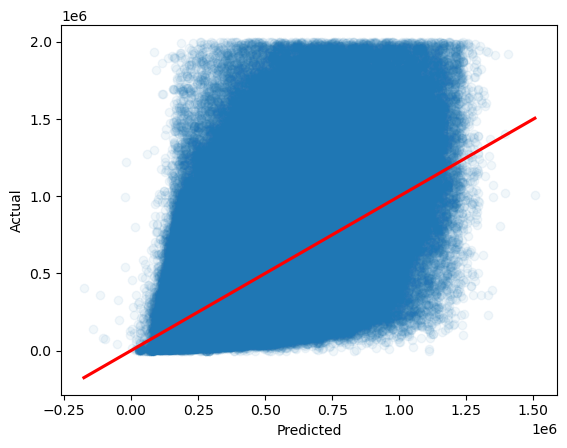

Best RMSE: 248492.80 for ('bedrooms', 'bathrooms', 'sqft', 'built', 'Orange', 'Ventura')
Best R^2: 0.35 for ('bedrooms', 'bathrooms', 'sqft', 'built', 'Orange', 'Ventura')


('bedrooms', 'bathrooms', 'sqft', 'built', 'Orange', 'Ventura')

In [6]:
# Run regression through all possible combinations. Select and graph best model.
eva.run_regression1(X_train_scaled, y_train) 
